In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression

In [6]:
df = pd.read_csv('../DATASET/galton.dat', sep='\s+')
print(df.shape)
df.head()


(898, 8)


family  father  mother gender  height  kids  male  female
0      1    78.5    67.0      M    73.2     4   1.0     0.0
1      1    78.5    67.0      F    69.2     4   0.0     1.0
2      1    78.5    67.0      F    69.0     4   0.0     1.0
3      1    78.5    67.0      F    69.0     4   0.0     1.0
4      2    75.5    66.5      M    73.5     4   1.0     0.0

The Galton dataset contains data about father, mothers, sex and the height of their children.

Columns:
- family: an id number of the family
- father: the height of the father
- mother: the height of the mother
- gender: the gender of the child $g \in \{M, F\}$.
- height: the height of the child.
- kids: the number of children in a the family.
- male: a float indicating if it is a male or not. 
    - 1.0 indicates True
    - 0.0 indicates False
- female: a float indicating if it is a female or not.
    - 1.0 indicates True
    - 0.0 indicates False
    
**Research question**: does a relationship exists between the height of the father, the height of the mother, and the height of the child?

**Method**: Linear Regression

**Rationale for using the method**: the reason for using the method is being able to predict height of a child, given the height of the father and mother. I want to estimate the relationship between the dependent variable (height of child) and the independent variables (height of father and mother). The method also gives insight into what variables are more important, although, in general, care must be taking with drawing conclusions due to the problem with multicollinearity.

**Expectations**: I expect there to be a relationship between the height of the father and mother, and the height of the child. This is due to the fact that we inherit genes from both father and mother, that affect the development of the body. 

**Assumption**:
- there are no measurement errors.
- the regressand can be explained by a linear combination of the regressors.
- there is no linear relationship between regressors.

-------------

**Columns and rows to use**:
- Columns: father, mother, height.
    - The most important data are the height of the father, mother and child. The other variables are not useful in answering the research question, although the variables could impact the actual height of the child. This is an option for further research.
- Rows: all rows, as every row indicates a unique child.

In [4]:
data = df[['father', 'mother', 'height']]
data = data.rename(columns={'father':'father_height', 'mother':'mother_height', 'height':'child_height'})
data.head()

father_height  mother_height  child_height
0           78.5           67.0          73.2
1           78.5           67.0          69.2
2           78.5           67.0          69.0
3           78.5           67.0          69.0
4           75.5           66.5          73.5

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 898 entries, 0 to 897
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   father_height  898 non-null    float64
 1   mother_height  898 non-null    float64
 2   child_height   898 non-null    float64
dtypes: float64(3)
memory usage: 21.2 KB


The data does not contain any **null** values, and the data are of type float. We can now take a look into the correlation.

<AxesSubplot:>

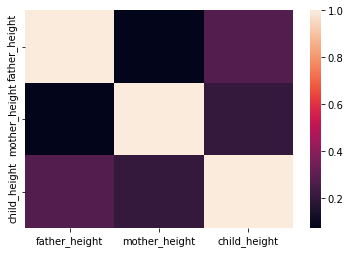

In [6]:
sns.heatmap(data.corr())

We can see there is a higher correlation between the height of the father and the hight of the child, than the height of the mother and the height of the child. This indicates, that the father may influence the height of the child in a higher degree. We can also see there is no correlation between the height of the mother and the father, thus they are independent.

In [7]:
data.var()

father_height     6.102164
mother_height     5.322365
child_height     12.837305
dtype: float64

In [8]:
data.mean()

father_height    69.232851
mother_height    64.084410
child_height     66.760690
dtype: float64

The data will not be standardized, as it contains the same units.

In [9]:
# Divide the dataset into X and y
X = data.iloc[:, :2].values
y = data.iloc[:, -1].values

In [10]:
X

array([[78.5, 67. ],
       [78.5, 67. ],
       [78.5, 67. ],
       ...,
       [68.5, 65. ],
       [68.5, 65. ],
       [68.5, 65. ]])

In [11]:
y

array([73.2, 69.2, 69. , 69. , 73.5, 72.5, 65.5, 65.5, 71. , 68. , 70.5,
       68.5, 67. , 64.5, 63. , 72. , 69. , 68. , 66.5, 62.5, 62.5, 69.5,
       76.5, 74. , 73. , 73. , 70.5, 64. , 70.5, 68. , 66. , 66. , 65.5,
       74. , 70. , 68. , 67. , 67. , 66. , 63.5, 63. , 65. , 68. , 67. ,
       71. , 70.5, 66.7, 72. , 70.5, 70.2, 70.2, 69.2, 68.7, 66.5, 64.5,
       63.5, 74. , 73. , 71.5, 62.5, 66.5, 62.3, 66. , 64.5, 64. , 62.7,
       73.2, 73. , 72.7, 70. , 69. , 68.5, 68. , 66. , 73. , 68.5, 68. ,
       73. , 71. , 67. , 74.2, 70.5, 69.5, 66. , 65.5, 65. , 65. , 65.5,
       66. , 63. , 70.5, 70.5, 69. , 65. , 63. , 69. , 67. , 63. , 73. ,
       67. , 70.5, 70. , 66.5, 63. , 67.5, 67.2, 66.7, 64. , 71. , 70. ,
       70. , 66. , 65. , 65. , 74. , 72. , 69. , 67.5, 63.5, 72. , 71.5,
       71.5, 70. , 68. , 65.7, 78. , 74. , 73. , 72. , 67. , 73.2, 73. ,
       69. , 67. , 70. , 67. , 67. , 66.5, 70. , 69. , 68.5, 66. , 64.5,
       63. , 71. , 67. , 76. , 72. , 71. , 66. , 66

In [12]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [13]:
pred = model.predict(X)
errors = y - pred

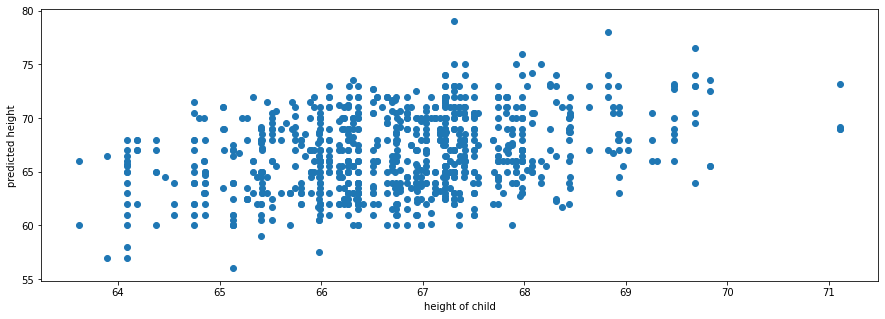

In [14]:
plt.figure(figsize=(15, 5))
plt.scatter(pred, y)
plt.ylabel('predicted height')
plt.xlabel('height of child')


plt.show()

In [15]:
from sklearn.metrics import mean_squared_error

In [16]:
mean_squared_error(y, pred)

11.426645212936897

**interpretation and reflection**

The current model is not good enough, it shows more variance then actually present. Therefore the it is advised to include more factors into the model, that possibly explain the height of the child.

To conclude, the expectation that only the height of the father and mother explain the height of the child is incorrect. Further research should be done.